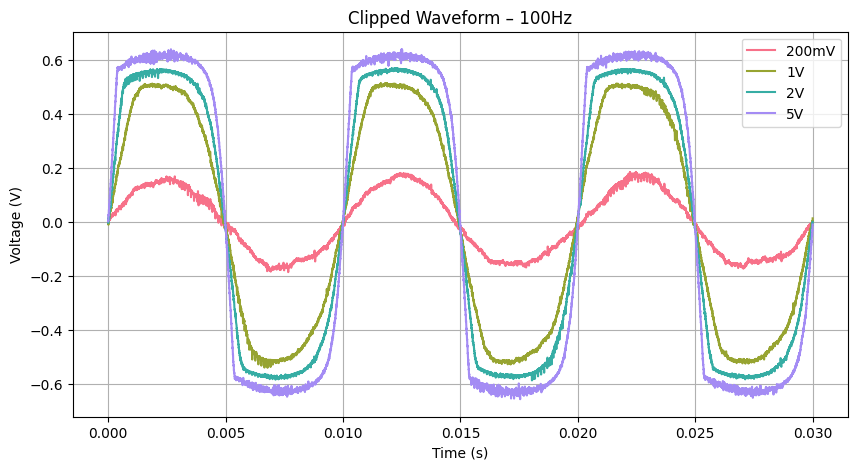

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
path_prefix = "../synth-diodes-out/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V",
    # "1kHz200mV",
    # "1kHz1V",
    # "1kHz2V",
    # "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):

    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
        # plt.plot(
        #     df["Time (s)"], 
        #     df["Channel 1 (V)"],  
        #     label=file.split("/")[2], 
        #     color=colors[i] # Use index 'i' to vary color
        # )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][5:], 
            color=colors[i] # Use index 'i' to vary color
        )
        # print(df_filtered)
    

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 100Hz")
    plt.grid()
    plt.legend()
    plt.savefig("Clipped-Waveform-100Hz.png")
    plt.show()

plot()


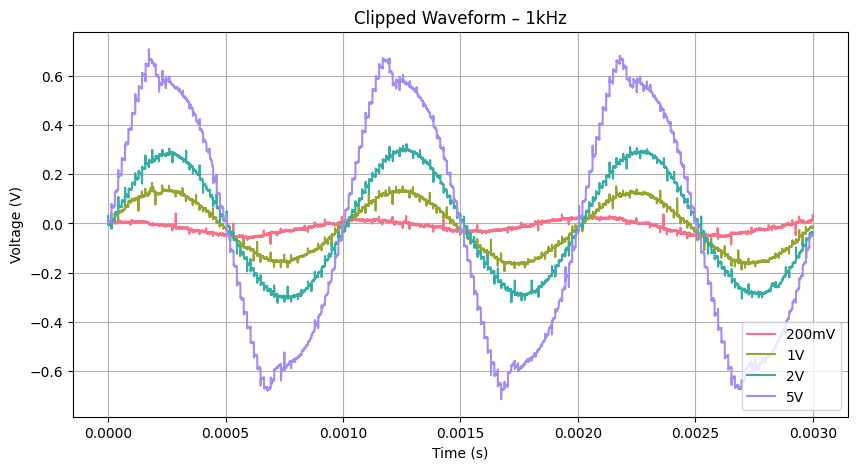

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
path_prefix = "../synth-diodes-out/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    # "100Hz200mV",
    # "100Hz1V",
    # # "100Hz2V",
    # "100Hz5V",
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.003)]
        # plt.plot(df["Time (s)"], 
        #          df["Channel 1 (V)"],  
        #          label=file.split("/")[2], 
        #          color=colors[i] # Use index 'i' to vary color
        #         )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][4:], 
            color=colors[i] # Use index 'i' to vary color
        )

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 1kHz")
    plt.grid()
    plt.legend(loc="lower right") 
    plt.savefig("Clipped-Waveform-1kHz.png")
    plt.show()

plot()


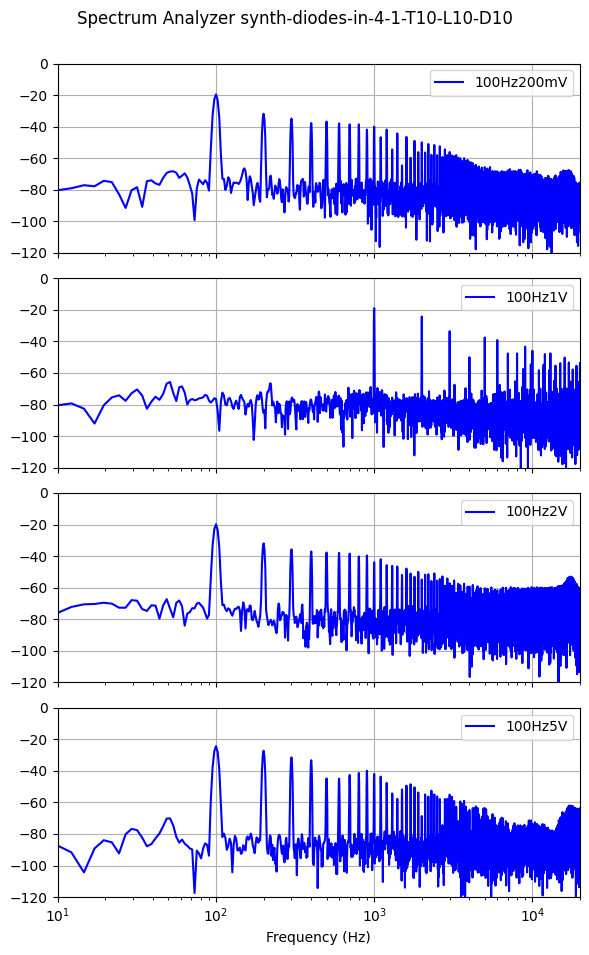

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns


# Define path prefix and suffix

# path_prefix = "../real-diodes-out/"
# path_prefix = "../real-diodes-in-T00-L10-D00/"
# path_prefix = "../real-diodes-in-T00-L10-D10/"
# path_prefix = "../real-diodes-in-T10-L10-D00/"
path_prefix = "../real-diodes-in-T10-L10-D10/"

## path_prefix = "../synth-diodes-out/"
# path_prefix = "../synth-diodes-in-T00-L10-D00/"
# path_prefix = "../synth-diodes-in-T00-L10-D10/"
# path_prefix = "../synth-diodes-in-T10-L10-D10/" 
# path_prefix = "../synth-diodes-in-T10-L10-D00/"

# path_prefix = "../synth-diodes-in-2-1-T10-L10-D10/"
path_prefix = "../synth-diodes-in-4-1-T10-L10-D10/"
path_suffix = "/spectrum.csv"


# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V",
    # "1kHz200mV",
    # "1kHz1V",
    # "1kHz2V",
    # "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Compute Global Axis Limits
all_data = [pd.read_csv(file, comment='#') for file in csv_files]

# global_xmax = max(df["Frequency (Hz)"].max() for df in all_data)
# global_xmin = min(df["Frequency (Hz)"].min() for df in all_data)
global_xmax = 20000
global_xmin = 10
global_ymax_mag = 0
global_ymin_mag = -120
# global_ymin_mag = min(df["Trace 1 (dBV)"].min() for df in all_data)
global_ymin_phase = min(df["Phase (deg)"].min() for df in all_data)
global_ymax_phase = max(df["Phase (deg)"].max() for df in all_data)

# Plot Magnitude Spectrum
def plot_spectrum(df, file_name):
    plt.figure(figsize=(10, 3))
    plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], color='b')
    # plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], label="Magnitude (dBV)", color='b')
    plt.xscale("log")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dBV)")
    plt.title("Spectrum Analyzer Output " + file_name)
    plt.xlim(global_xmin, global_xmax)  # Apply global x-axis limits
    plt.ylim(global_ymin_mag, global_ymax_mag)  # Apply global y-axis limits for magnitude
    plt.grid()
    plt.legend()
    plt.savefig( "spectrum-" + file_name + ".png")
    plt.show()

# Plot Phase Response
def plot_phase(df, file_name):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Frequency (Hz)"], df["Phase (deg)"], label="Phase (deg)", color='r')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (degrees)")
    plt.title("Phase Response" + file_name)
    plt.grid()
    plt.legend()
    plt.show()

def plot_all( files ):# Process and plot each file  


    # colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    fig, ax1 = plt.subplots(len(files), 1, figsize=(6, 10), sharex=True)
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
       
        # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        # fig.suptitle('Spectrum – Phase plots')
        
        ax1[i].plot(
            df["Frequency (Hz)"], 
            df["Trace 1 (dBV)"], 
            label=file.split("/")[2], 
            color='b'
            #  color=colors[i] # Use index 'i' to vary color
            )
        # ax1[i].set_xlabel("Frequency (Hz)")
        # ax1[i].set_ylabel("Magnitude (dBV)")
        ax1[i].legend()
        ax1[i].set_xscale("log")
        ax1[i].set_xlim(global_xmin, global_xmax)  # Apply global x-axis limits
        ax1[i].set_ylim(global_ymin_mag, global_ymax_mag)  # Apply global y-axis limits for magnitude
        ax1[i].grid()

        # Remove x-labels except for the last plot
        if i < len(files) - 1:
            ax1[i].set_xticklabels([])
        else:
            ax1[i].set_xlabel("Frequency (Hz)")


        fig.suptitle("Spectrum Analyzer " + file.split("/")[1], )
        plt.subplots_adjust(hspace=0.5)  # Reduce vertical spacing
        plt.tight_layout(rect=[0, 0.03, 1, 0.98])  # Optimize layout while preserving title
        # ax1.savefig( "spectrum-" + file + ".png")

        # ax2.plot(df["Frequency (Hz)"], 
        #          df["Phase (deg)"], 
        #          label=file.split("/")[2], 
        #         #  color=colors[i] # Use index 'i' to vary color
        #          color='b'
        #          ) 
        
        # ax2.set_xlabel("Frequency (Hz)")
        # # ax2.set_ylabel("Phase (deg)")
        # ax2.legend()


plot_all( csv_files)

def plot_spectra(files):
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        plot_spectrum(df, file.split("/")[2])


# plot_spectra(csv_files)

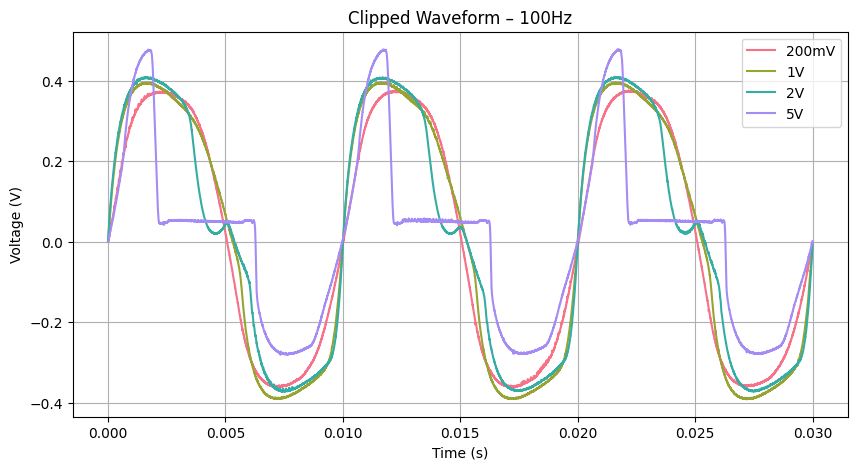

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
path_prefix = "../synth-diodes-in-T00-L10-D00/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V",
    # "1kHz200mV",
    # "1kHz1V",
    # "1kHz2V",
    # "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):

    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
        # plt.plot(
        #     df["Time (s)"], 
        #     df["Channel 1 (V)"],  
        #     label=file.split("/")[2], 
        #     color=colors[i] # Use index 'i' to vary color
        # )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][5:], 
            color=colors[i] # Use index 'i' to vary color
        )
        # print(df_filtered)
    

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 100Hz")
    plt.grid()
    plt.legend()
    plt.savefig("Clipped-Waveform-100Hz.png")
    plt.show()

plot()


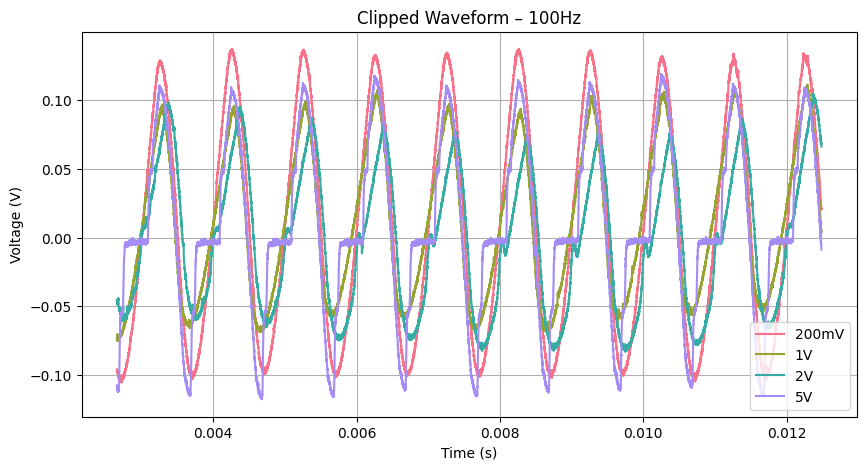

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
path_prefix = "../synth-diodes-in-T00-L10-D00/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    # "100Hz200mV",
    # "100Hz1V",
    # "100Hz2V",
    # "100Hz5V",
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):

    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
        # plt.plot(
        #     df["Time (s)"], 
        #     df["Channel 1 (V)"],  
        #     label=file.split("/")[2], 
        #     color=colors[i] # Use index 'i' to vary color
        # )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][4:], 
            color=colors[i] # Use index 'i' to vary color
        )
        # print(df_filtered)
    

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 100Hz")
    plt.grid()
    plt.legend()
    plt.savefig("Clipped-Waveform-100Hz.png")
    plt.show()

plot()


/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40967/101214944.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


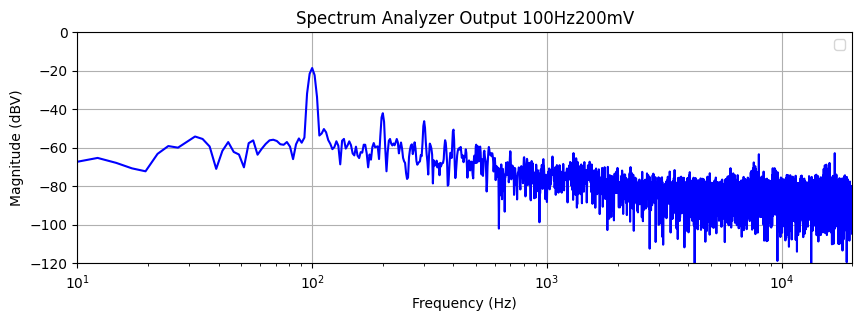

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40967/101214944.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


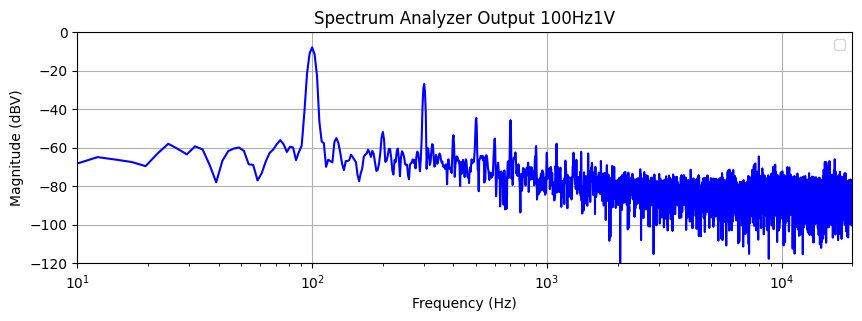

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40967/101214944.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


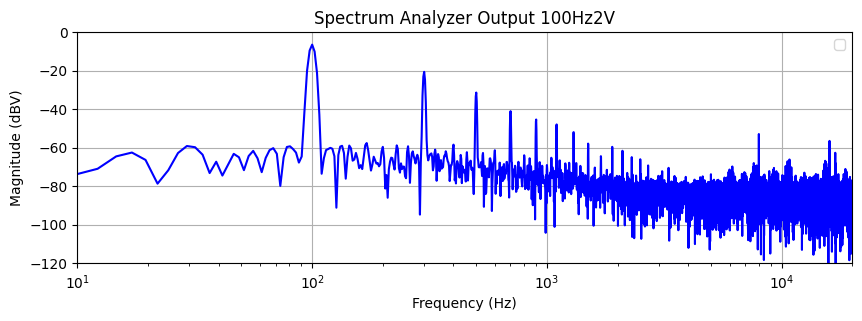

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40967/101214944.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


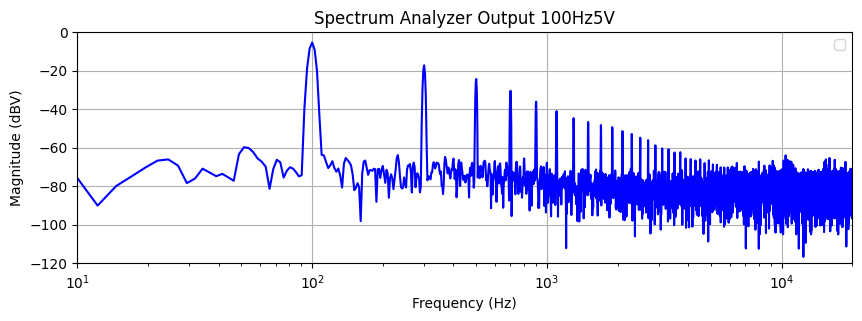

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40967/101214944.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


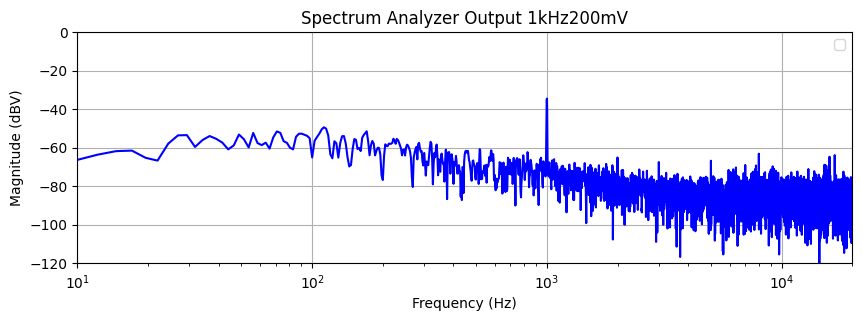

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40967/101214944.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


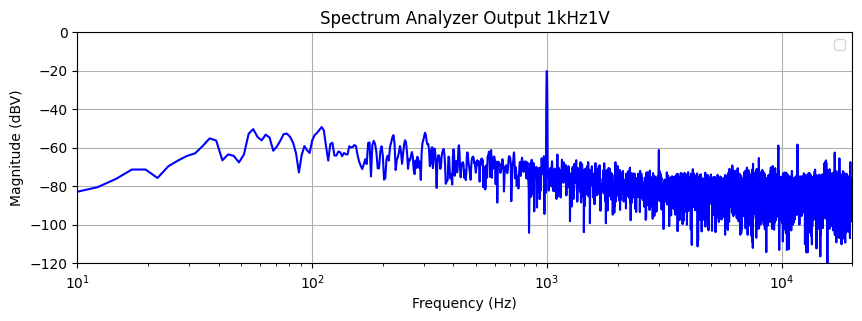

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40967/101214944.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


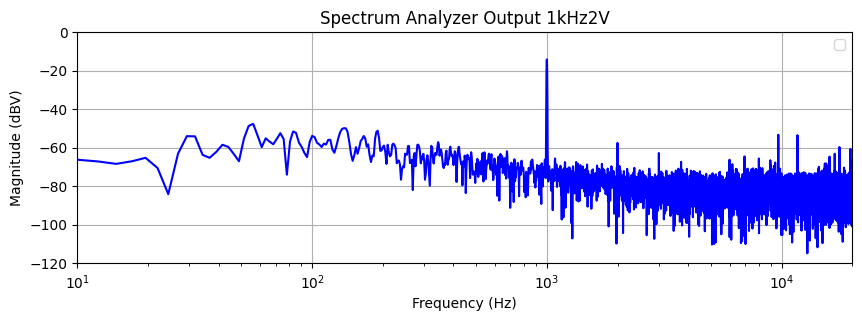

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40967/101214944.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


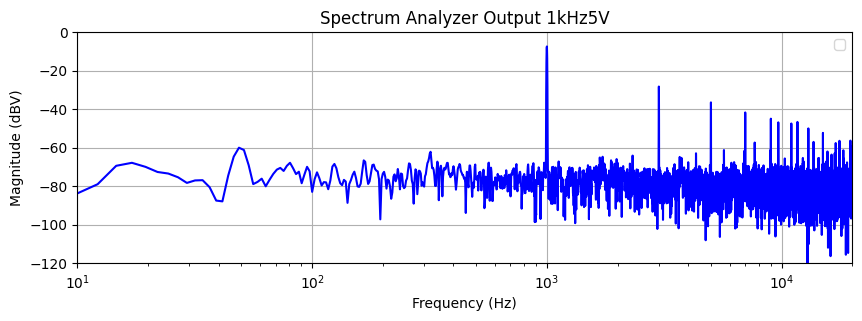

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns


# Define path prefix and suffix
# path_prefix = "../SynthDiodesOutOfCircuit/-bkp-20250403/"
path_prefix = "../synth-diodes-in-T00-L10-D10/"
path_suffix = "/spectrum.csv"

# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V",
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Compute Global Axis Limits
all_data = [pd.read_csv(file, comment='#') for file in csv_files]

# global_xmax = max(df["Frequency (Hz)"].max() for df in all_data)
# global_xmin = min(df["Frequency (Hz)"].min() for df in all_data)
global_xmax = 20000
global_xmin = 10
global_ymax_mag = 0
global_ymin_mag = -120
# global_ymin_mag = min(df["Trace 1 (dBV)"].min() for df in all_data)
global_ymin_phase = min(df["Phase (deg)"].min() for df in all_data)
global_ymax_phase = max(df["Phase (deg)"].max() for df in all_data)

# Plot Magnitude Spectrum
def plot_spectrum(df, file_name):
    plt.figure(figsize=(10, 3))
    plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], color='b')
    # plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], label="Magnitude (dBV)", color='b')
    plt.xscale("log")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dBV)")
    plt.title("Spectrum Analyzer Output " + file_name)
    plt.xlim(global_xmin, global_xmax)  # Apply global x-axis limits
    plt.ylim(global_ymin_mag, global_ymax_mag)  # Apply global y-axis limits for magnitude
    plt.grid()
    plt.legend()
    plt.savefig( "spectrum-" + file_name + ".png")
    plt.show()

# Plot Phase Response
def plot_phase(df, file_name):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Frequency (Hz)"], df["Phase (deg)"], label="Phase (deg)", color='r')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (degrees)")
    plt.title("Phase Response" + file_name)
    plt.grid()
    plt.legend()
    plt.show()

def plot_all( files ):# Process and plot each file  

    # colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
       
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle('Spectrum – Phase plots')
        
        ax1.plot(df["Frequency (Hz)"], 
                 df["Trace 1 (dBV)"], 
                 label=file.split("/")[2], 
                 color='b'
                #  color=colors[i] # Use index 'i' to vary color
                 )
        ax2.plot(df["Frequency (Hz)"], 
                 df["Phase (deg)"], 
                 label=file.split("/")[2], 
                #  color=colors[i] # Use index 'i' to vary color
                 color='b'
                 ) 
        
        ax1.set_xlabel("Frequency (Hz)")
        ax1.set_ylabel("Magnitude (dBV)")
        ax2.set_xlabel("Frequency (Hz)")
        ax2.set_ylabel("Phase (deg)")
        ax1.legend()
        ax2.legend()


# plot_all( csv_files)

def plot_spectra(files):
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        plot_spectrum(df, file.split("/")[2])


plot_spectra(csv_files)

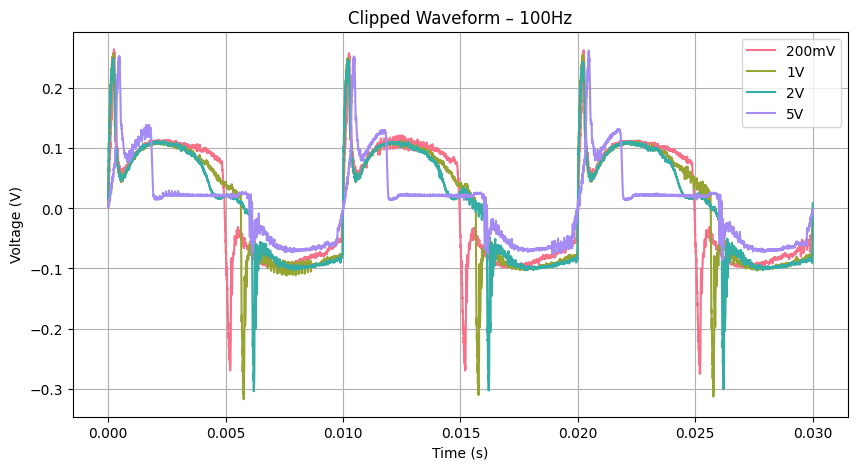

In [ ]:
# path_prefix = "../synth-diodes-in-T00-L10-D00/" 100Hz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
# path_prefix = "../synth-diodes-in-T00-L10-D00/"
# path_prefix = "../synth-diodes-in-T00-L10-D10/"
# path_prefix = "../synth-diodes-in-T10-L10-D00/"
path_prefix = "../synth-diodes-in-T10-L10-D10/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V",
    # "1kHz200mV",
    # "1kHz1V",
    # "1kHz2V",
    # "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):

    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
        # plt.plot(
        #     df["Time (s)"], 
        #     df["Channel 1 (V)"],  
        #     label=file.split("/")[2], 
        #     color=colors[i] # Use index 'i' to vary color
        # )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][5:], 
            color=colors[i] # Use index 'i' to vary color
        )
        # print(df_filtered)
    

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 100Hz")
    plt.grid()
    plt.legend()
    plt.savefig("Clipped-Waveform-100Hz.png")
    plt.show()

plot()


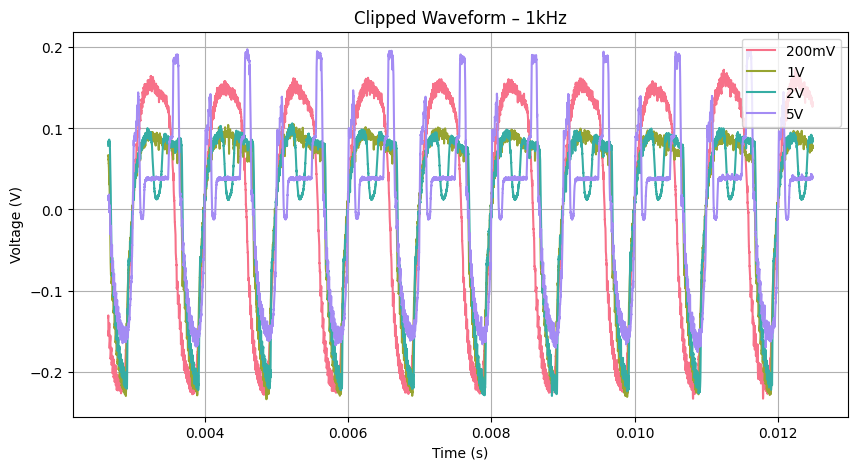

In [ ]:
# path_prefix = "../synth-diodes-in-T00-L10-D00/" 1KHz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
# path_prefix = "../synth-diodes-in-T00-L10-D00/"
# path_prefix = "../synth-diodes-in-T00-L10-D10/"
path_prefix = "../synth-diodes-in-T10-L10-D00/"
# path_prefix = "../synth-diodes-in-T10-L10-D10/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    # "100Hz200mV",
    # "100Hz1V",
    # "100Hz2V",
    # "100Hz5V",
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):

    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
        # plt.plot(
        #     df["Time (s)"], 
        #     df["Channel 1 (V)"],  
        #     label=file.split("/")[2], 
        #     color=colors[i] # Use index 'i' to vary color
        # )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][4:], 
            color=colors[i] # Use index 'i' to vary color
        )
        # print(df_filtered)
    

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 1kHz")
    plt.grid()
    plt.legend()
    plt.savefig("Clipped-Waveform-1kHz.png")
    plt.show()

plot()


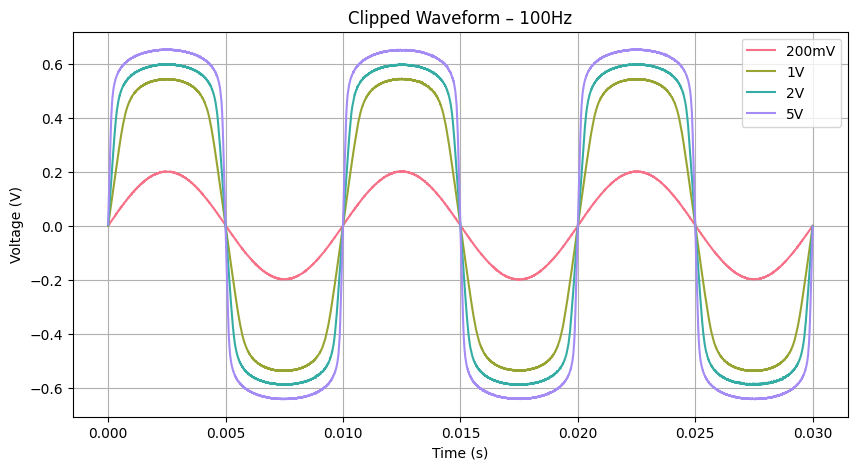

In [ ]:
# path_prefix = "../real-diodes-out/"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
path_prefix = "../real-diodes-out/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V",
    # "1kHz200mV",
    # "1kHz1V",
    # "1kHz2V",
    # "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):

    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.03)]
        # plt.plot(
        #     df["Time (s)"], 
        #     df["Channel 1 (V)"],  
        #     label=file.split("/")[2], 
        #     color=colors[i] # Use index 'i' to vary color
        # )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][5:], 
            color=colors[i] # Use index 'i' to vary color
        )
        # print(df_filtered)
    

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 100Hz")
    plt.grid()
    plt.legend()
    plt.savefig("Clipped-Waveform-100Hz.png")
    plt.show()

plot()


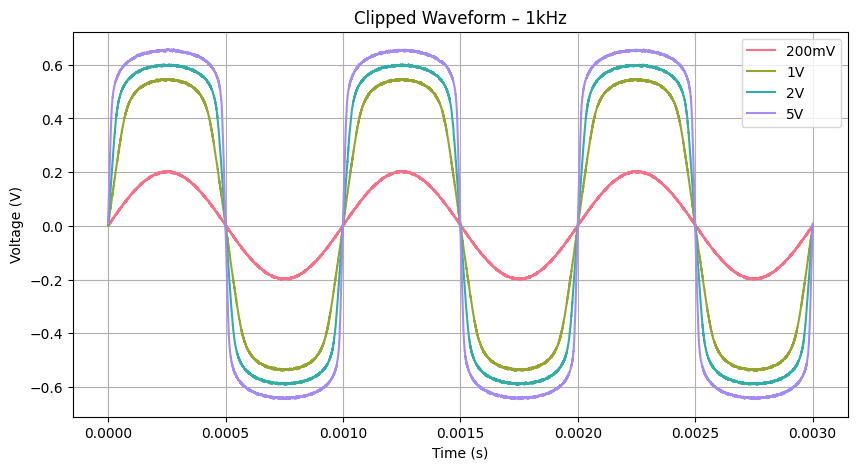

In [ ]:
# path_prefix = "../real-diodes-out/"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

# Define path prefix and suffix
path_prefix = "../real-diodes-out/"
path_suffix = "/scope.csv"

# List of parameterized CSV file paths
parameters = [
    # "100Hz200mV",
    # "100Hz1V",
    # "100Hz2V",
    # "100Hz5V",
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Plot Oscilloscope Waveform
def plot_waveform(plt, df, name):

    plt.figure(figsize=(10, 5))
    plt.plot(df["Time (s)"], df["Channel 1 (V)"], label=name, color='b')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Scope " + name)
    plt.grid()
    plt.legend()
    plt.show()


def plotAll( plt, files ):# Process and plot each file  
    
    colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        df_filtered = df[(df["Time (s)"] >= 0) & (df["Time (s)"] <= 0.003)]
        # plt.plot(
        #     df["Time (s)"], 
        #     df["Channel 1 (V)"],  
        #     label=file.split("/")[2], 
        #     color=colors[i] # Use index 'i' to vary color
        # )
        plt.plot(
            df_filtered["Time (s)"],
            df_filtered["Channel 1 (V)"], 
            label=file.split("/")[2][4:], 
            color=colors[i] # Use index 'i' to vary color
        )
        # print(df_filtered)
    

def plot():
    plt.figure(figsize=(10, 5))
    plotAll(plt, csv_files)
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.title("Clipped Waveform – 1kHz")
    plt.grid()
    plt.legend()
    plt.savefig("Clipped-Waveform-1kHz.png")
    plt.show()

plot()


/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/3065562785.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


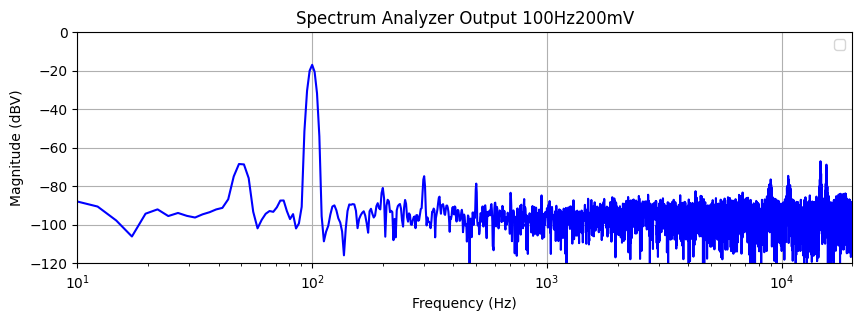

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/3065562785.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


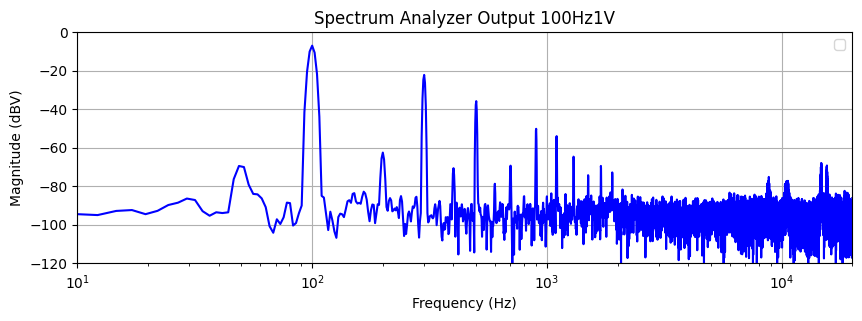

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/3065562785.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


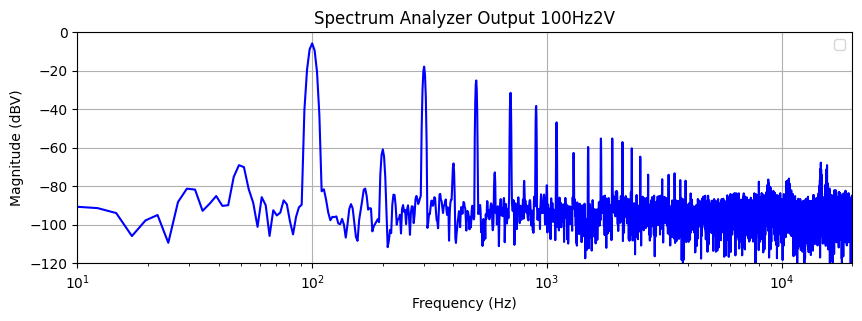

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/3065562785.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


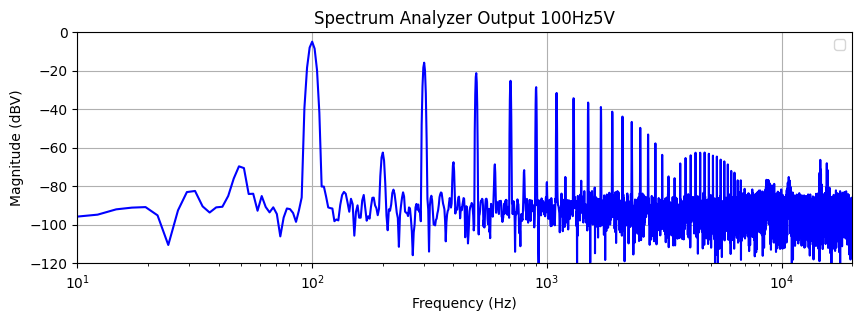

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/3065562785.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


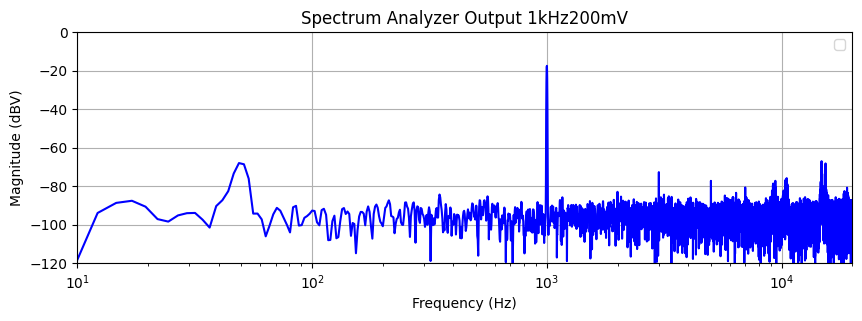

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/3065562785.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


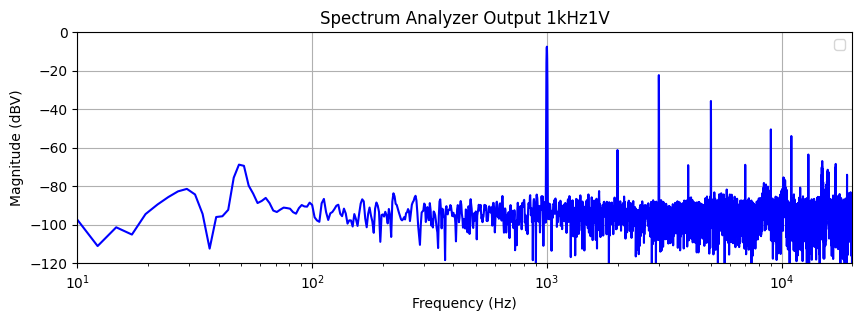

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/3065562785.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


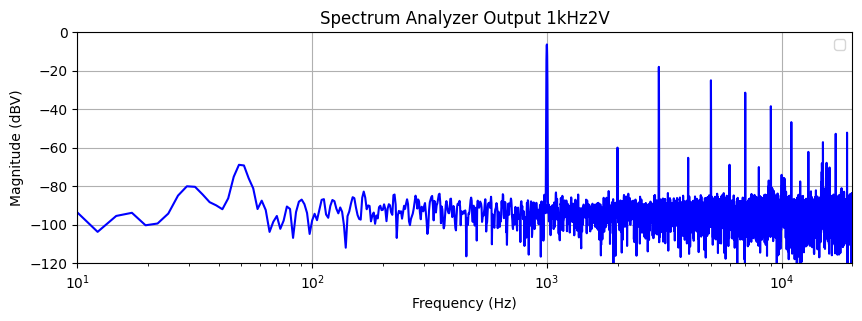

/var/folders/10/yxvsq_bs3l970t62mzzkgk0c0000gp/T/ipykernel_40854/3065562785.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


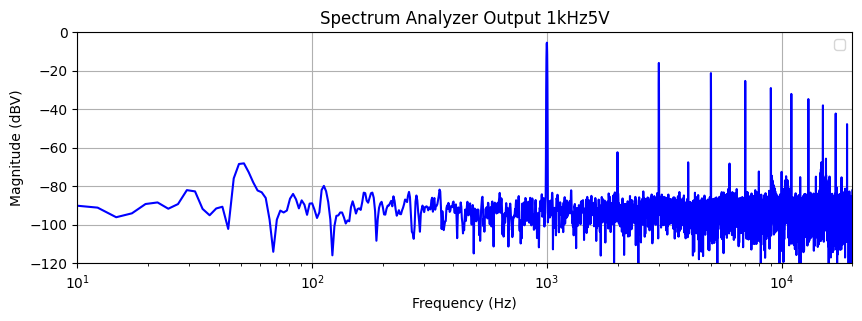

In [93]:
# path_prefix = "../real-diodes-out/"
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns


# Define path prefix and suffix
path_prefix = "../real-diodes-out/"
path_suffix = "/spectrum.csv"

# List of parameterized CSV file paths
parameters = [
    "100Hz200mV",
    "100Hz1V",
    "100Hz2V",
    "100Hz5V",
    "1kHz200mV",
    "1kHz1V",
    "1kHz2V",
    "1kHz5V",
]

csv_files = [path_prefix + param + path_suffix for param in parameters]

# Compute Global Axis Limits
all_data = [pd.read_csv(file, comment='#') for file in csv_files]

# global_xmax = max(df["Frequency (Hz)"].max() for df in all_data)
# global_xmin = min(df["Frequency (Hz)"].min() for df in all_data)
global_xmax = 20000
global_xmin = 10
global_ymax_mag = 0
global_ymin_mag = -120
# global_ymin_mag = min(df["Trace 1 (dBV)"].min() for df in all_data)
global_ymin_phase = min(df["Phase (deg)"].min() for df in all_data)
global_ymax_phase = max(df["Phase (deg)"].max() for df in all_data)

# Plot Magnitude Spectrum
def plot_spectrum(df, file_name):
    plt.figure(figsize=(10, 3))
    plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], color='b')
    # plt.plot(df["Frequency (Hz)"], df["Trace 1 (dBV)"], label="Magnitude (dBV)", color='b')
    plt.xscale("log")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dBV)")
    plt.title("Spectrum Analyzer Output " + file_name)
    plt.xlim(global_xmin, global_xmax)  # Apply global x-axis limits
    plt.ylim(global_ymin_mag, global_ymax_mag)  # Apply global y-axis limits for magnitude
    plt.grid()
    plt.legend()
    plt.savefig( "spectrum-" + file_name + ".png")
    plt.show()

# Plot Phase Response
def plot_phase(df, file_name):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Frequency (Hz)"], df["Phase (deg)"], label="Phase (deg)", color='r')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (degrees)")
    plt.title("Phase Response" + file_name)
    plt.grid()
    plt.legend()
    plt.show()

def plot_all( files ):# Process and plot each file  

    # colors = sns.color_palette("husl", len(files))  # Generates distinct colors
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
       
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle('Spectrum – Phase plots')
        
        ax1.plot(df["Frequency (Hz)"], 
                 df["Trace 1 (dBV)"], 
                 label=file.split("/")[2], 
                 color='b'
                #  color=colors[i] # Use index 'i' to vary color
                 )
        ax2.plot(df["Frequency (Hz)"], 
                 df["Phase (deg)"], 
                 label=file.split("/")[2], 
                #  color=colors[i] # Use index 'i' to vary color
                 color='b'
                 ) 
        
        ax1.set_xlabel("Frequency (Hz)")
        ax1.set_ylabel("Magnitude (dBV)")
        ax2.set_xlabel("Frequency (Hz)")
        ax2.set_ylabel("Phase (deg)")
        ax1.legend()
        ax2.legend()


# plot_all( csv_files)

def plot_spectra(files):
    for i, file in enumerate(files):  # Get index (i) and file
        df = pd.read_csv(file, comment='#')
        plot_spectrum(df, file.split("/")[2])


plot_spectra(csv_files)